In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import fits
from astropy.wcs import WCS

In [19]:
df_norma_askap = pd.read_pickle('decomposition_results/ASKAP/norma_askap_final.pkl')
df_hydra_askap = pd.read_pickle('decomposition_results/ASKAP/hydra_askap_final.pkl')
df_normaV2_atca = pd.read_pickle('decomposition_results/ATCA/norma_atca_0.2kms_final.pkl')
df_norma4k_atca = pd.read_pickle('decomposition_results/ATCA/norma_atca_4kms_final.pkl')
df_hydraV2_atca = pd.read_pickle('decomposition_results/ATCA/hydra_atca_0.2kms_final.pkl')
df_hydra4k_atca = pd.read_pickle('decomposition_results/ATCA/hydra_atca_4kms_final.pkl')

In [20]:
print('Sources decomposed from ASKAP-Norma: ',df_norma_askap['source'].nunique())
print('Sources decomposed from ASKAP-Hydra: ',df_hydra_askap['source'].nunique())
print('Sources decomposed from ATCA-Norma 4km/s: ',df_norma4k_atca['source'].nunique())
print('Sources decomposed from ATCA-Norma 0.2km/s: ',df_normaV2_atca['source'].nunique())
print('Sources decomposed from ATCA-Hydra 4km/s: ',df_hydra4k_atca['source'].nunique())
print('Sources decomposed from ATCA-Hydra 0.2km/s: ',df_hydraV2_atca['source'].nunique())

Sources decomposed from ASKAP-Norma:  258
Sources decomposed from ASKAP-Hydra:  42
Sources decomposed from ATCA-Norma 4km/s:  40
Sources decomposed from ATCA-Norma 0.2km/s:  18
Sources decomposed from ATCA-Hydra 4km/s:  13
Sources decomposed from ATCA-Hydra 0.2km/s:  17


## Functions

In [21]:
def match_sources(df1, df2):
    # Round 'ra (deg)' and 'dec (deg)' columns to 2 decimal places
    df1_rounded = df1.copy()
    df2_rounded = df2.copy()
    
    df1_rounded['ra (deg)'] = df1_rounded['ra (deg)'].round(2)
    df1_rounded['dec (deg)'] = df1_rounded['dec (deg)'].round(2)
    
    df2_rounded['ra (deg)'] = df2_rounded['ra (deg)'].round(2)
    df2_rounded['dec (deg)'] = df2_rounded['dec (deg)'].round(2)
    
    # Merge on 'ra (deg)' and 'dec (deg)'
    merged_df = pd.merge(df1_rounded, df2_rounded, 
                         on=['ra (deg)', 'dec (deg)'], 
                         suffixes=('_df1', '_df2'), 
                         how='inner')
    
    # Return the tuple of matched 'source' columns from both DataFrames
    return list(zip(merged_df['source_df1'], merged_df['source_df2']))


In [22]:
def plot_variables(title, target):

    data1 = np.concatenate([df_hydraV2_atca[target], df_hydra4k_atca[target]])
    data2 = np.concatenate([df_normaV2_atca[target], df_norma4k_atca[target]])
    
    # Create bins for both subplots
    bins1 = np.histogram_bin_edges(df_hydra_askap[target], bins='auto')
    bins2 = np.histogram_bin_edges(df_norma_askap[target], bins='auto')
    
    # Create figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    # Upper part, ASKAP title on left
    fig.text(-0.02, 0.75, 'ASKAP', fontsize=16, ha='left', rotation=90)
    
    # Plot histograms for ASKAP 0.2 km/s
    axes[0][0].hist(df_hydra_askap[target], bins=bins1, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='4km/s')
    axes[0][0].set_xlabel(title, fontsize=12)
    axes[0][0].set_ylabel('N', fontsize=12)
    axes[0][0].legend()
    
    # Plot histograms for ASKAP 4 km/s
    axes[0][1].hist(df_norma_askap[target], bins=bins2, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='4km/s')
    axes[0][1].set_xlabel(title, fontsize=12)
    axes[0][1].set_ylabel('N', fontsize=12)
    axes[0][1].legend()
    
    # Lower part, ATCA title on left
    fig.text(-0.02, 0.25, 'ATCA', fontsize=16, ha='left', rotation=90)
    fig.text(0.30, 1.02, 'HYDRA', fontsize=16, ha='center')
    fig.text(0.75, 1.02, 'NORMA', fontsize=16, ha='center')
    
    # Plot histograms for ATCA 0.2 km/s\
    axes[1][0].hist(df_hydraV2_atca[target], bins=bins1, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='0.2km/s')
    axes[1][0].hist(df_hydra4k_atca[target], bins=bins1, color='blue', edgecolor='black', hatch='\\', alpha=0.2, label='4km/s')
    axes[1][0].set_xlabel(title, fontsize=12)
    axes[1][0].set_ylabel('N', fontsize=12)
    axes[1][0].legend()
    
    # Plot histograms for ATCA 4 km/s
    axes[1][1].hist(df_normaV2_atca[target], bins=bins2, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='0.2km/s')
    axes[1][1].hist(df_norma4k_atca[target], bins=bins2, color='blue', edgecolor='black', hatch='\\', alpha=0.2, label='4km/s')
    axes[1][1].set_xlabel(title, fontsize=12)
    axes[1][1].set_ylabel('N', fontsize=12)
    axes[1][1].legend()
    
    plt.tight_layout()
    plt.show()

In [23]:
def plot_variables_common(target, title):

    df_norma_concat = pd.concat([df_norma_askap_filter, df_norma_askap_filter_v2]).drop_duplicates()
    df_hydra_concat = pd.concat([df_hydra_askap_filter, df_hydra_askap_filter_v2]).drop_duplicates()

    #data1 = np.concatenate([df_norma_concat[target], df_norma4k_atca_filter[target], df_normaV2_atca_filter[target]])
    #data2 = np.concatenate([df_hydra_concat[target], df_hydra4k_atca_filter[target], df_hydraV2_atca_filter[target]])
    #data3 = np.concatenate([df_norma_askap_filter_v2[target], df_normaV2_atca_filter[target]])
    #data4 = np.concatenate([df_hydra_askap_filter_v2[target], df_hydraV2_atca_filter[target]])
    
    # Create bins for both subplots
    bins1 = np.histogram_bin_edges(df_hydra_concat[target], bins='auto')
    bins2 = np.histogram_bin_edges(df_norma_concat[target], bins='auto')
    #bins3 = np.histogram_bin_edges(data3, bins='auto')
    #bins4 = np.histogram_bin_edges(data4, bins='auto')
    # Create figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    # Upper part, ASKAP title on left
    fig.text(-0.02, 0.75, 'ASKAP', fontsize=16, ha='left', rotation=90)
    
    # Plot histograms for ASKAP 4 km/s
    axes[0][0].hist(df_hydra_concat[target], bins=bins1, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='4km/s')
    #axes[0][0].hist(df_hydra4k_atca_filter[target], bins=bins2, color='blue', edgecolor='black', hatch='\\', alpha=0.2, label='ATCA')
    axes[0][0].set_xlabel(title, fontsize=12)
    axes[0][0].set_ylabel('N', fontsize=12)
    axes[0][0].legend()
    
    # Plot histograms for ASKAP 0.2 km/s
    axes[0][1].hist(df_norma_concat[target], bins=bins2, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='4km/s')
    #axes[0][1].hist(df_norma4k_atca_filter[target], bins=bins1, color='blue', edgecolor='black', hatch='\\', alpha=0.2, label='ATCA')
    axes[0][1].set_xlabel(title, fontsize=12)
    axes[0][1].set_ylabel('N', fontsize=12)
    axes[0][1].legend()
    

    # Lower part, ATCA title on left
    fig.text(-0.02, 0.25, 'ATCA', fontsize=16, ha='left', rotation=90)
    fig.text(0.30, 1.02, 'HYDRA', fontsize=16, ha='center')
    fig.text(0.75, 1.02, 'NORMA', fontsize=16, ha='center')

        # Plot histograms for ATCA 4 km/s
    #axes[1][0].hist(df_hydra_askap_filter_v2[target], bins=bins4, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='ASKAP')
    axes[1][0].hist(df_hydraV2_atca_filter[target], bins=bins1, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='0.2km/s ')
    axes[1][0].hist(df_hydra4k_atca_filter[target], bins=bins1, color='blue', edgecolor='black', hatch='\\', alpha=0.2, label='4km/s')
    axes[1][0].set_xlabel(title, fontsize=12)
    axes[1][0].set_ylabel('N', fontsize=12)
    axes[1][0].legend()
    
    # Plot histograms for ATCA 0.2 km/s\
    #axes[1][1].hist(df_norma_askap_filter_v2[target], bins=bins3, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='ASKAP')
    axes[1][1].hist(df_normaV2_atca_filter[target], bins=bins2, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='0.2km/s')
    axes[1][1].hist(df_norma4k_atca_filter[target], bins=bins2, color='blue', edgecolor='black', hatch='\\', alpha=0.2, label='4km/s')
    axes[1][1].set_xlabel(title, fontsize=12)
    axes[1][1].set_ylabel('N', fontsize=12)
    axes[1][1].legend()

    
    plt.tight_layout()
    plt.show()

In [24]:
def filter_by_sources(df1, df2, unique_tuples):
    # Extract the first and second elements from the unique tuples
    df1_sources = [t[0] for t in unique_tuples]  # First element for df1
    df2_sources = [t[1] for t in unique_tuples]  # Second element for df2

    # Filter df1 and df2 based on matching 'source' columns
    df1_filtered = df1[df1['source'].isin(df1_sources)]
    df2_filtered = df2[df2['source'].isin(df2_sources)]

    return df1_filtered, df2_filtered


## Data manipulation

In [25]:
list_common_norma = match_sources(df_norma_askap, df_norma4k_atca)
list_common_norma = list(set(list_common_norma))

In [26]:
list_common_norma_v2 = match_sources(df_norma_askap, df_normaV2_atca)
list_common_norma_v2 = list(set(list_common_norma_v2))

In [27]:
list_common_hydra = match_sources(df_hydra_askap, df_hydra4k_atca)
list_common_hydra = list(set(list_common_hydra))

In [28]:
list_common_hydra_v2 = match_sources(df_hydra_askap, df_hydraV2_atca)
list_common_hydra_v2 = list(set(list_common_hydra_v2))

In [29]:
print(len(list_common_norma))
print(len(list_common_hydra))
print(len(list_common_norma_v2))
print(len(list_common_hydra_v2))

26
9
11
12


In [30]:
df_norma_askap_filter, df_norma4k_atca_filter = filter_by_sources(df_norma_askap, df_norma4k_atca,list_common_norma)
df_hydra_askap_filter, df_hydra4k_atca_filter = filter_by_sources(df_hydra_askap, df_hydra4k_atca,list_common_hydra)

df_norma_askap_filter_v2, df_normaV2_atca_filter = filter_by_sources(df_norma_askap, df_normaV2_atca,list_common_norma_v2)
df_hydra_askap_filter_v2, df_hydraV2_atca_filter = filter_by_sources(df_hydra_askap, df_hydraV2_atca,list_common_hydra_v2)

## AMP

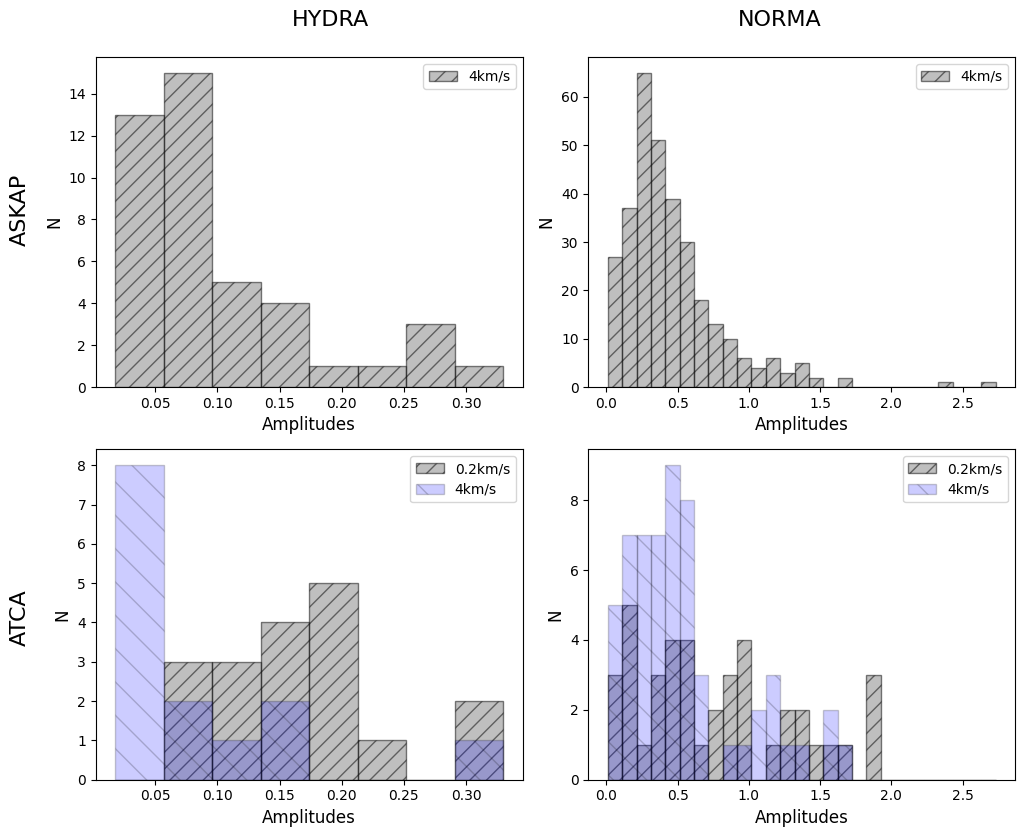

In [33]:
plot_variables('Amplitudes', 'amp')

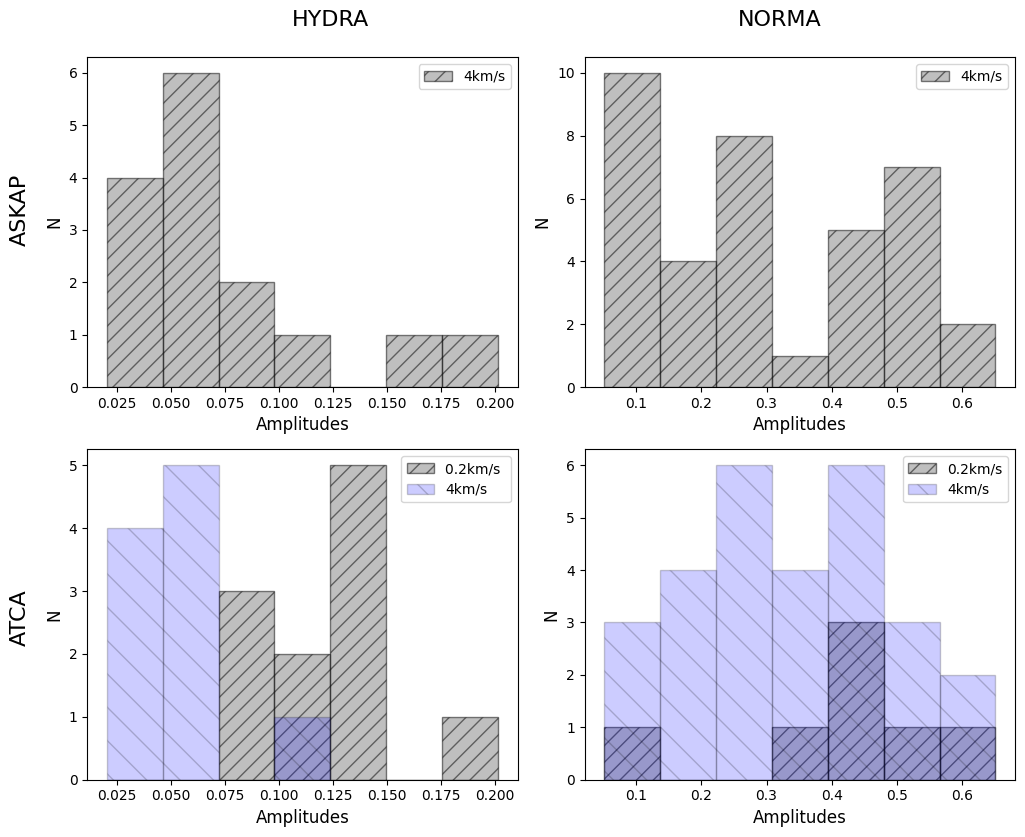

In [34]:
# Example usage
plot_variables_common(target='amp', title = 'Amplitudes')


## VLSR

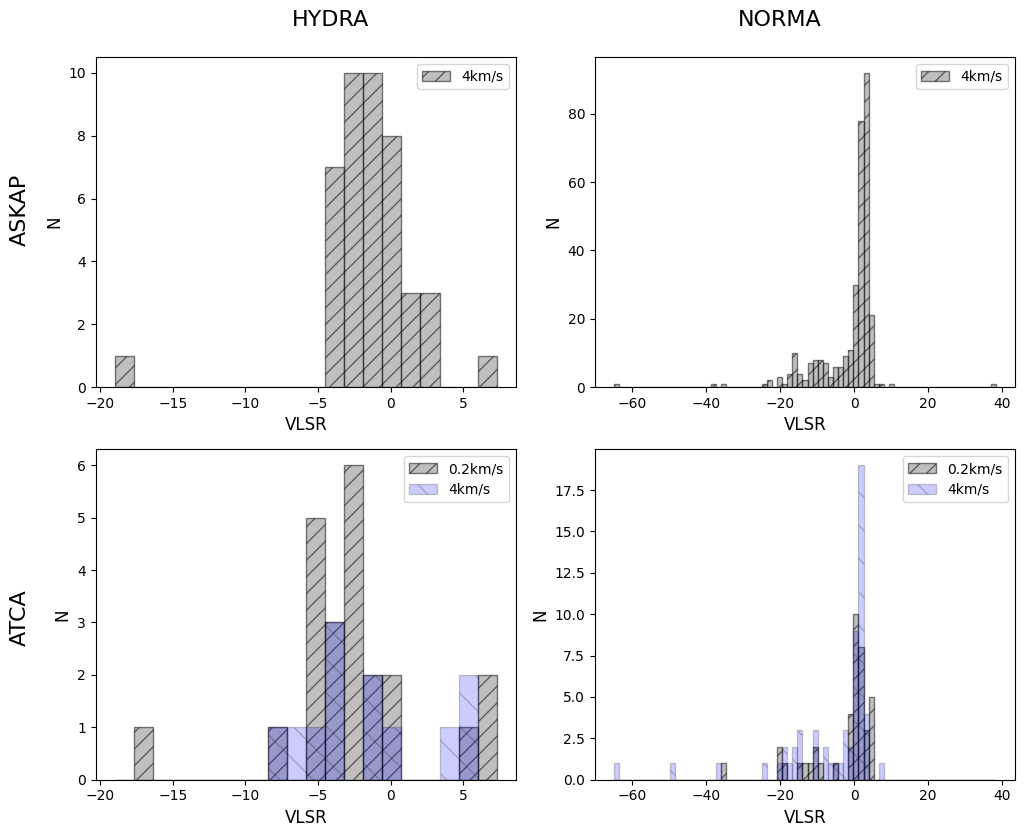

In [35]:
plot_variables('VLSR', 'VLSR')

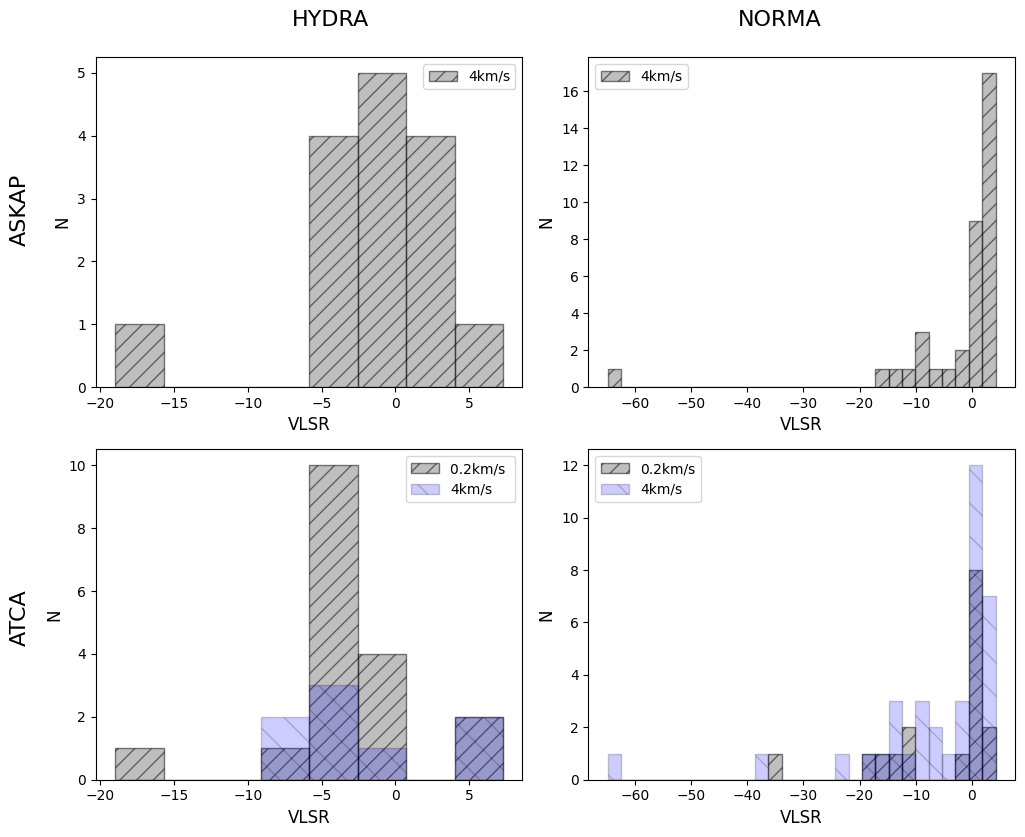

In [36]:
plot_variables_common(target='VLSR', title = 'VLSR')


## Total intensity

In [ ]:
plot_variables('Total intensity', 'int_tot')

## Velocity dispersion

In [ ]:
plot_variables('Velocity dispersion', 'vel_disp')